# Loading Dataset

In [60]:
import pandas as pd 
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression                         
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors                           
from sklearn import tree, linear_model                         
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import joblib

In [61]:
df = pd.read_csv('/Users/veronica/Downloads/hw5 team project/heloc_dataset_v1.csv')

In [62]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [63]:
# Convert the values in Y to 1 and 0 for the labels "Bad" and "Good"
X = df.iloc[:, 1:24]
#X = X.drop(X.columns[0], axis=1)
Y = df['RiskPerformance'].replace({'Bad': 1, 'Good': 0})

In [64]:
X.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,55,144,4,84,20,3,0,83,2,3,...,43,0,0,0,33,-8,8,1,1,69
1,61,58,15,41,2,4,4,100,-7,0,...,67,0,0,0,0,-8,0,-8,-8,0
2,67,66,5,24,9,0,0,100,-7,7,...,44,0,4,4,53,66,4,2,1,86
3,66,169,1,73,28,1,1,93,76,6,...,57,0,5,4,72,83,6,4,3,91
4,81,333,27,132,12,0,0,100,-7,7,...,25,0,1,1,51,89,3,1,0,80


In [65]:
Y.head(2)

0    1
1    1
Name: RiskPerformance, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2, random_state=10)

Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=10)

In [67]:
# preprocessing for df_train
df_train = pd.concat([X_train, Y_train], axis=1)

In [68]:
df_train.head(2)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
1338,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,1
3268,87,270,15,98,29,0,0,100,-7,7,...,5,0,0,0,-8,0,-8,0,0,0


# Handing Missing Data

In [69]:
# Update the variable X_train, X_test, Y_train, Y_test by removing any observation where the feature ExternalRiskEstimate is missing(-9).

# Remove any observation where ExternalRiskEstimate is -9 from training set
X_train = X_train.loc[X_train['ExternalRiskEstimate'] != -9]
Y_train = Y_train[X_train.index]

# Remove any observation where ExternalRiskEstimate is -9 from testing set
X_test = X_test.loc[X_test['ExternalRiskEstimate'] != -9]
Y_test = Y_test[X_test.index]

In [70]:
df_count_missing = pd.concat([(X_train==-7).sum(),(X_train==-8).sum(),(X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]

In [71]:
df_count_missing
# now we clean all the -9 value 

,-7,-8,-9
ExternalRiskEstimate,0,0,0
MSinceOldestTradeOpen,0,196,0
MSinceMostRecentTradeOpen,0,0,0
AverageMInFile,0,0,0
NumSatisfactoryTrades,0,0,0
NumTrades60Ever2DerogPubRec,0,0,0
NumTrades90Ever2DerogPubRec,0,0,0
PercentTradesNeverDelq,0,0,0
MSinceMostRecentDelq,3731,138,0
MaxDelq2PublicRecLast12M,0,0,0


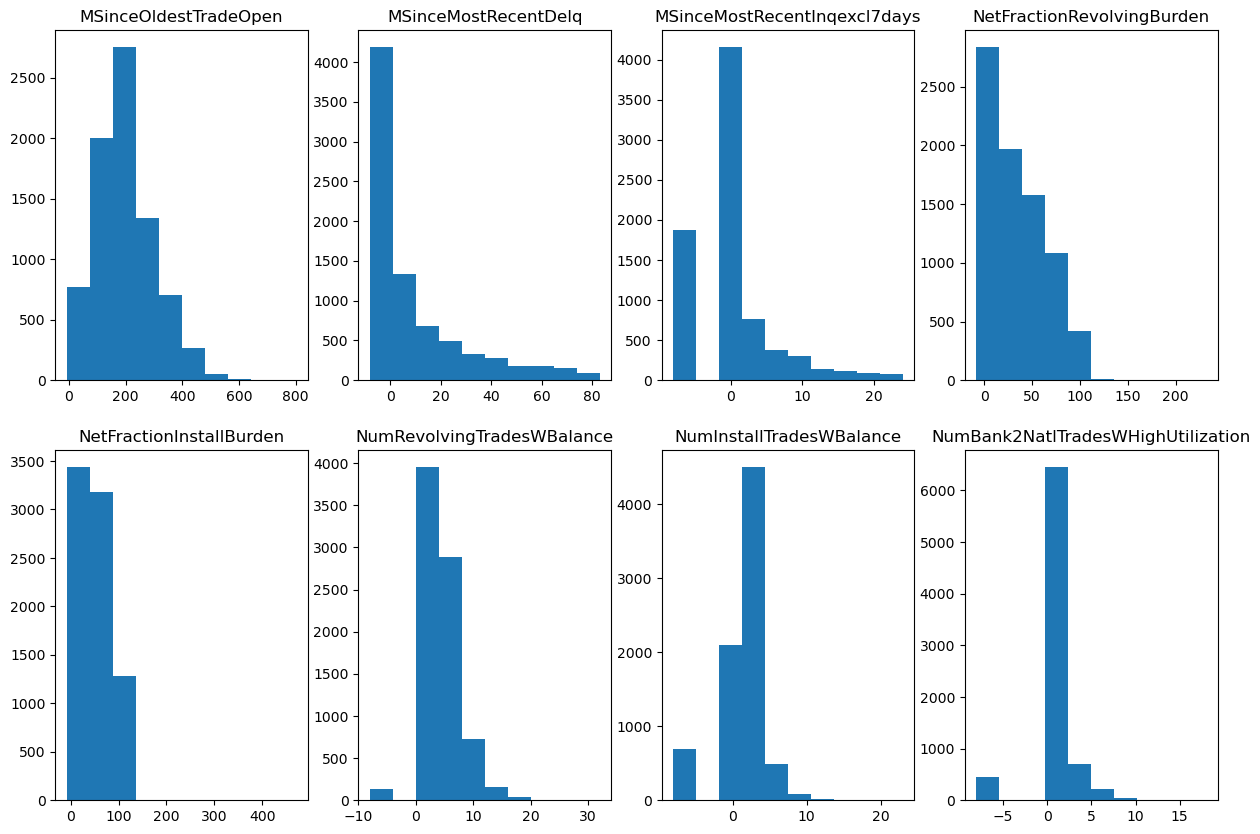

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# create a figure with subplots for each column
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# create a histogram for each column and add it to the corresponding subplot
axs[0, 0].hist(X_train['MSinceOldestTradeOpen'])
axs[0, 1].hist(X_train['MSinceMostRecentDelq'])
axs[0, 2].hist(X_train['MSinceMostRecentInqexcl7days'])
axs[0, 3].hist(X_train['NetFractionRevolvingBurden'])
axs[1, 0].hist(X_train['NetFractionInstallBurden'])
axs[1, 1].hist(X_train['NumRevolvingTradesWBalance'])
axs[1, 2].hist(X_train['NumInstallTradesWBalance'])
axs[1, 3].hist(X_train['NumBank2NatlTradesWHighUtilization'])

# set titles for the subplots
axs[0, 0].set_title('MSinceOldestTradeOpen')
axs[0, 1].set_title('MSinceMostRecentDelq')
axs[0, 2].set_title('MSinceMostRecentInqexcl7days')
axs[0, 3].set_title('NetFractionRevolvingBurden')
axs[1, 0].set_title('NetFractionInstallBurden')
axs[1, 1].set_title('NumRevolvingTradesWBalance')
axs[1, 2].set_title('NumInstallTradesWBalance')
axs[1, 3].set_title('NumBank2NatlTradesWHighUtilization')

# display the figure
plt.show()


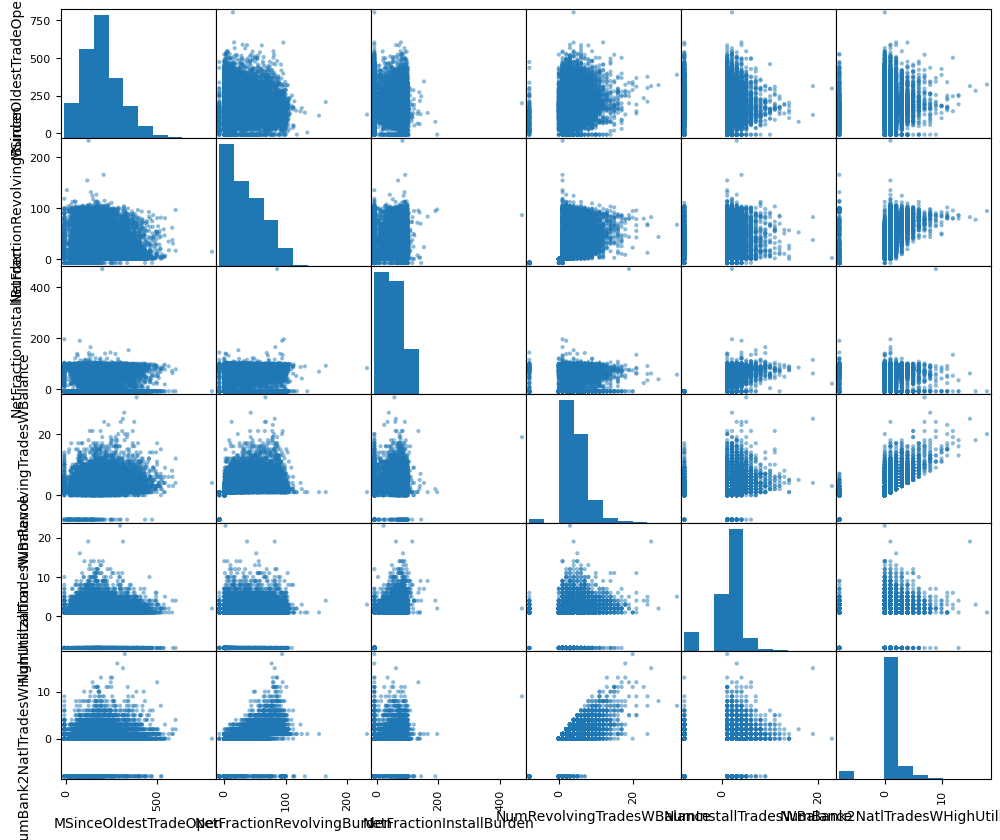

In [73]:
from pandas.plotting import scatter_matrix
attributes=["MSinceOldestTradeOpen","NetFractionRevolvingBurden","NetFractionInstallBurden","NumRevolvingTradesWBalance","NumInstallTradesWBalance","NumBank2NatlTradesWHighUtilization"]
scatter_matrix(X_train[attributes],figsize=(12,10));

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])
 
pipeline = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='most_frequent'))])

arr_X_train_t = pipeline.fit_transform(X_train)
arr_X_train_t

array([[ 87, 270,  15, ...,   1,   0,   0],
       [ 80, 253,   8, ...,   1,   1,   0],
       [ 83, 140,  11, ...,   0,   0,   0],
       ...,
       [ 83, 321,   2, ...,   0,   0,   0],
       [ 78,  64,  12, ...,   0,   0,   0],
       [ 56, 177,   4, ...,   0,   0,   0]])

In [75]:
minus_7_indicator_transformer_X = MissingIndicator(missing_values=-7, features='missing-only').fit(X_train)
minus_8_indicator_transformer_X = MissingIndicator(missing_values=-8, features='missing-only').fit(X_train)

col_names_minus_7_Xtrain = X_train.columns.values[minus_7_indicator_transformer_X.features_].tolist() 
col_names_minus_7_Xtrain = list(map(lambda s:str(s)+'=-7',col_names_minus_7_Xtrain)) 
col_names_minus_8_Xtrain = X_train.columns.values[minus_8_indicator_transformer_X.features_].tolist() 
col_names_minus_8_Xtrain = list(map(lambda s:str(s)+'=-8',col_names_minus_8_Xtrain))
column_names = X_train.columns.values.tolist() + col_names_minus_7_Xtrain + col_names_minus_8_Xtrain
column_names

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'MSinceMostRecentDelq=-7',
 'MSinceMostRecentInqexcl7days=-7',
 'MSinceOldestTradeOpen=-8',
 'MSinceMostRecentDelq=-8',
 'MSinceMostRecentInqexcl7days=-8',
 'NetFractionRevolvingBurden=-8',
 'NetFractionInstallBurden=-8',
 'NumRevolvingTradesWBalance=-8',
 'NumInstallTradesWBalance=-8',
 'NumBank2NatlTradesWHighUtilization=-8',
 'PercentTradesWBalance=-8']

In [76]:
X_train_t = pd.DataFrame(arr_X_train_t, columns= column_names)
X_train_t

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,87,270,15,98,29,0,0,100,1,7,...,0,0,0,0,0,1,0,1,0,0
1,80,253,8,97,14,0,0,100,1,7,...,0,0,0,0,0,1,0,1,1,0
2,83,140,11,94,17,0,0,94,56,6,...,0,0,0,1,0,0,0,0,0,0
3,65,240,9,64,29,0,0,97,57,6,...,0,0,0,0,0,0,0,0,0,0
4,80,160,7,49,15,0,0,100,1,7,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,66,207,14,95,4,2,1,67,22,6,...,0,0,0,0,0,1,0,0,0,0
7901,79,165,2,100,31,2,1,95,72,6,...,0,0,0,0,0,1,0,0,0,0
7902,83,321,2,103,31,0,0,100,1,7,...,0,0,0,0,0,0,0,0,0,0
7903,78,64,12,34,24,0,0,100,1,7,...,0,0,0,0,0,1,0,0,0,0


In [77]:
X_train_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   ExternalRiskEstimate                   7905 non-null   int64
 1   MSinceOldestTradeOpen                  7905 non-null   int64
 2   MSinceMostRecentTradeOpen              7905 non-null   int64
 3   AverageMInFile                         7905 non-null   int64
 4   NumSatisfactoryTrades                  7905 non-null   int64
 5   NumTrades60Ever2DerogPubRec            7905 non-null   int64
 6   NumTrades90Ever2DerogPubRec            7905 non-null   int64
 7   PercentTradesNeverDelq                 7905 non-null   int64
 8   MSinceMostRecentDelq                   7905 non-null   int64
 9   MaxDelq2PublicRecLast12M               7905 non-null   int64
 10  MaxDelqEver                            7905 non-null   int64
 11  NumTotalTrades                

In [78]:
df_count_missing = pd.concat([(X_train_t==-7).sum(),(X_train_t==-8).sum(),(X_train_t==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]
df_count_missing.head(2)

,-7,-8,-9
ExternalRiskEstimate,0,0,0
MSinceOldestTradeOpen,0,0,0


In [79]:
X_train_t.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,87,270,15,98,29,0,0,100,1,7,...,0,0,0,0,0,1,0,1,0,0
1,80,253,8,97,14,0,0,100,1,7,...,0,0,0,0,0,1,0,1,1,0
2,83,140,11,94,17,0,0,94,56,6,...,0,0,0,1,0,0,0,0,0,0
3,65,240,9,64,29,0,0,97,57,6,...,0,0,0,0,0,0,0,0,0,0
4,80,160,7,49,15,0,0,100,1,7,...,0,0,0,0,0,1,0,0,0,0


# Normalization

In [80]:
from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling 
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(X_train_t)

In [81]:
# create a dataframe with scaled values and same column names as X_train_t
X_train_t_scaled = pd.DataFrame(data=scaled_values, columns=X_train_t.columns)

# check the first few rows of the new dataframe
X_train_t_scaled.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,0.885246,0.334582,0.066079,0.295597,0.367089,0.0,0.0,1.00,0.012048,0.777778,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.770492,0.313358,0.035242,0.292453,0.177215,0.0,0.0,1.00,0.012048,0.777778,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.819672,0.172285,0.048458,0.283019,0.215190,0.0,0.0,0.94,0.674699,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.524590,0.297129,0.039648,0.188679,0.367089,0.0,0.0,0.97,0.686747,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.770492,0.197253,0.030837,0.141509,0.189873,0.0,0.0,1.00,0.012048,0.777778,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
scaler_Stand = StandardScaler()
scaled_values_stand = scaler_Stand.fit_transform(X_train_t)

In [83]:
# create a dataframe with scaled values and same column names as X_train_t
X_train_t_scaled_stand = pd.DataFrame(data=scaled_values_stand, columns=X_train_t.columns)

# check the first few rows of the new dataframe
X_train_t_scaled_stand.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,1.516270,0.719308,0.433844,0.560997,0.684434,-0.46852,-0.385505,0.649686,-0.587412,0.758338,...,-0.482141,-0.159452,-0.133295,-0.225649,-0.140019,1.377966,-0.128292,3.220885,-0.247131,-0.033761
1,0.805320,0.543458,-0.128757,0.531589,-0.633559,-0.46852,-0.385505,0.649686,-0.587412,0.758338,...,-0.482141,-0.159452,-0.133295,-0.225649,-0.140019,1.377966,-0.128292,3.220885,4.046434,-0.033761
2,1.110013,-0.625422,0.112358,0.443363,-0.369961,-0.46852,-0.385505,0.140379,2.423610,0.149062,...,-0.482141,-0.159452,-0.133295,4.431669,-0.140019,-0.725707,-0.128292,-0.310474,-0.247131,-0.033761
3,-0.718145,0.408985,-0.048386,-0.438891,0.684434,-0.46852,-0.385505,0.395033,2.478356,0.149062,...,-0.482141,-0.159452,-0.133295,-0.225649,-0.140019,-0.725707,-0.128292,-0.310474,-0.247131,-0.033761
4,0.805320,-0.418540,-0.209129,-0.880019,-0.545693,-0.46852,-0.385505,0.649686,-0.587412,0.758338,...,-0.482141,-0.159452,-0.133295,-0.225649,-0.140019,1.377966,-0.128292,-0.310474,-0.247131,-0.033761


# Classification Model 

In [ ]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
X_train_t_tr, X_train_t_val = train_test_split(X_train_t, test_size=0.25, random_state=1234)
Y_train_t_tr, Y_train_t_val = train_test_split(Y_train, test_size=0.25, random_state=1234)

log_reg = LogisticRegression(max_iter=10000, random_state=0).fit(X_train_t_tr, Y_train_t_tr) # Logistic regression
svc     = SGDClassifier(max_iter=1000, random_state=0).fit(X_train_t_tr, Y_train_t_tr)       # Linear SVM
#clf_SVM = svm.SVC(kernel='linear').fit(X_train_t_tr, Y_train_t_tr)


In [26]:
# evaluate model
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(Y_train_t_val, log_reg.predict(X_train_t_val))
accuracy_log_reg

0.7435508345978755

In [88]:
accuracy_svc = accuracy_score(Y_train_t_val, svc.predict(X_train_t_val))
accuracy_svc


0.6707132018209409

In [28]:
accuracy_clf_SVM = accuracy_score(Y_train_t_val, clf_SVM.predict(X_train_t_val))
accuracy_clf_SVM


0.7430450177035913

In [30]:
from sklearn.model_selection import cross_validate
cv_results_log_reg = cross_validate(linear_model.LogisticRegression(max_iter=10000), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_svc = cross_validate(linear_model.SGDClassifier(max_iter=10000), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_clf_SVM = cross_validate(svm.SVC(kernel='linear'), X_train_t, Y_train, cv=5, return_estimator=True)

In [31]:
print('Logistic regresion - CV accuracy score %.3f'%cv_results_log_reg['test_score'].mean()) # this is their average value
print('SVC - CV accuracy score %.3f'%cv_results_svc['test_score'].mean()) # this is their average value
print('clf_SVM - CV accuracy score %.3f'%cv_results_clf_SVM['test_score'].mean()) # this is their average value

Logistic regresion - CV accuracy score 0.734
SVC - CV accuracy score 0.590
clf_SVM - CV accuracy score 0.735


In [33]:
X_test = pipeline.fit_transform(X_test)
outofsample_accuracy_clf_SVM = accuracy_score(Y_test, clf_SVM.predict(X_test))
outofsample_accuracy_clf_SVM

/Users/veronica/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.745398773006135

In [34]:
outofsample_accuracy_log_reg = accuracy_score(Y_test, log_reg.predict(X_test))
outofsample_accuracy_log_reg

/Users/veronica/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7443762781186094

In [87]:
X_test = pipeline.fit_transform(X_test)
outofsample_accuracy_svc = accuracy_score(Y_test, svc.predict(X_test))
outofsample_accuracy_svc

/Users/veronica/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


0.6579754601226994

In [38]:
X_test


array([[ 80, 323,  12, ...,   0,   0,   0],
       [ 86,  94,   9, ...,   0,   0,   0],
       [ 84, 340,  16, ...,   0,   0,   0],
       ...,
       [ 88, 125,   7, ...,   0,   0,   0],
       [ 88, 194,  16, ...,   0,   0,   0],
       [ 83, 283,   6, ...,   0,   0,   0]])

In [ ]:
df_processed = np.concatenate((X_processed, X1[:,23:]), axis=1)

In [ ]:
#clf_svm_poly = svm.SVC(kernel='poly', degree=2, C=10**10).fit(X_train_t_tr, Y_train_t_tr) # non linear 
#clf_svm_rbf = svm.SVC(kernel='rbf', C=10**10).fit(X_train_t_tr, Y_train_t_tr) #non linear


In [ ]:
#accuracy_clf_svm_poly = accuracy_score(Y_train_t_val, clf_svm_poly.predict(X_train_t_val))
#accuracy_clf_svm_poly


In [125]:
#accuracy_clf_svm_rbf = accuracy_score(Y_train_t_val, clf_svm_rbf.predict(X_train_t_val))
#accuracy_clf_svm_rbf


NameError: name 'clf_svm_poly' is not defined

In [122]:
# Train regularized models for logistic regression
from sklearn.linear_model import LogisticRegressionCV

exp_lb1, exp_ub1, num_values1 = -2, 2, 30
Cs = np.geomspace(10**exp_lb1, 10**exp_ub1, num_values1)
df_logistic1 = LogisticRegressionCV(Cs=Cs, cv=5, random_state=0, penalty='l1', solver='liblinear').fit(X_train_t, Y_train)
means1 = df_logistic1.scores_[1].mean(axis=0)
stds1 = df_logistic1.scores_[1].std(axis=0)
best1 = accuracy_score(y_validation, df_logistic1.predict(X_validation))

exp_lb2, exp_ub2, num_values2 = -2, 2, 30
Cs = np.geomspace(10**exp_lb2, 10**exp_ub2, num_values2)
df_logistic2 = LogisticRegressionCV(Cs=Cs, cv=5, random_state=0, penalty='l2', solver='liblinear').fit(X_train_t, Y_train)
means2 = df_logistic2.scores_[1].mean(axis=0)
stds2 = df_logistic2.scores_[1].std(axis=0)
best2 = accuracy_score(y_validation, df_logistic2.predict(X_validation))

FileNotFoundError: [Errno 2] No such file or directory: 'figures/accuracy_log_reg.png'

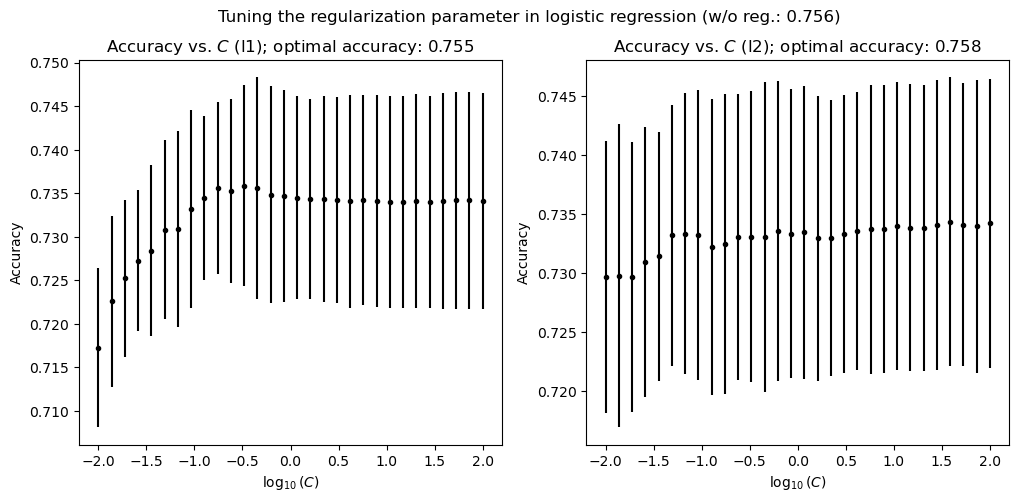

In [123]:
# visualize results (tuning)
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].errorbar(np.linspace(exp_lb1,exp_ub1,num_values2), means1, yerr=stds1, fmt='.k');
axes[0].set_xlabel(r'$\log_{10}(C)$'); axes[0].set_ylabel('Accuracy'); axes[0].set_title(r'Accuracy vs. $C$ (l1); optimal accuracy: %.3f'%best1);
axes[1].errorbar(np.linspace(exp_lb2,exp_ub1,num_values2), means2, yerr=stds2, fmt='.k');
axes[1].set_xlabel(r'$\log_{10}(C)$'); axes[1].set_ylabel('Accuracy'); axes[1].set_title(r'Accuracy vs. $C$ (l2); optimal accuracy: %.3f'%best2);
fig.suptitle('Tuning the regularization parameter in logistic regression (w/o reg.: %.3f)'%accuracy_log_reg)
plt.savefig('figures/accuracy_log_reg.png')

In [124]:
from sklearn.model_selection import cross_val_score # cross validation
X, Y, results =X_train_t, Y_train, []
for i in np.linspace(0.01,1,20): 
    clf = svm.SVC(kernel='linear',C=i)  
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append([i,scores.mean(), scores.std()])    
df_accuracy = pd.DataFrame(data=results,columns=['C','mean','std']).round(2)
df_accuracy.plot.bar(x='C',y='mean',yerr='std', title='CV Accuracy vs. C', figsize=(10,2));

KeyboardInterrupt: 

In [ ]:
# feature expansion (还没跑过肯定会巨慢，考虑是不是要选取几个feature做)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_expanded = poly.fit_transform(X)
print('Features:', poly.get_feature_names())
print('Expanded data matrix\n', X_expanded[:3,:]) # first 3 rows

# train linear models again, this time with X_expanded instead of X
clf_svm = svm.SVC(kernel='linear').fit(X_expanded, Y)
clf_log = LogisticRegression(random_state=0, C=10**10, solver='liblinear').fit(X_expanded,Y)
print('SVM accuracy:', accuracy_score(Y, clf_svm.predict(X_expanded)))
print('Log. Reg. accuracy:', accuracy_score(Y, clf_log.predict(X_expanded)))

# Standardized

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])
 
from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling 
#scaler = MinMaxScaler()
#scaled_values = scaler.fit_transform(X_train_t)
# include standlization using Standard Scaler

pipeline = Pipeline([("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                     ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='most_frequent')),
                     ("scaling", StandardScaler())])

In [40]:
X1 = X.copy()

In [41]:
X1

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,55,144,4,84,20,3,0,83,2,3,...,43,0,0,0,33,-8,8,1,1,69
1,61,58,15,41,2,4,4,100,-7,0,...,67,0,0,0,0,-8,0,-8,-8,0
2,67,66,5,24,9,0,0,100,-7,7,...,44,0,4,4,53,66,4,2,1,86
3,66,169,1,73,28,1,1,93,76,6,...,57,0,5,4,72,83,6,4,3,91
4,81,333,27,132,12,0,0,100,-7,7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73,131,5,57,21,0,0,95,80,6,...,19,7,0,0,26,-8,5,2,0,100
10455,65,147,39,68,11,0,0,92,28,6,...,42,1,1,1,86,53,2,2,1,80
10456,74,129,6,64,18,1,1,100,-7,6,...,33,3,4,4,6,-8,5,-8,0,56
10457,72,234,12,113,42,2,2,96,35,6,...,20,6,0,0,19,-8,4,1,0,38


In [42]:
X1 = feature_expansion.fit_transform(X1)
X_processed = pipeline.fit_transform(X1[:, :23])

In [46]:
minus_7_indicator_transformer_X = MissingIndicator(missing_values=-7, features='missing-only').fit(X)
minus_8_indicator_transformer_X = MissingIndicator(missing_values=-8, features='missing-only').fit(X)

col_names_minus_7_Xtrain = X.columns.values[minus_7_indicator_transformer_X.features_].tolist() 
col_names_minus_7_Xtrain = list(map(lambda s:str(s)+'=-7',col_names_minus_7_Xtrain)) 
col_names_minus_8_Xtrain = X.columns.values[minus_8_indicator_transformer_X.features_].tolist() 
col_names_minus_8_Xtrain = list(map(lambda s:str(s)+'=-8',col_names_minus_8_Xtrain))
column_names = X.columns.values.tolist() + col_names_minus_7_Xtrain + col_names_minus_8_Xtrain
column_names

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'MSinceMostRecentDelq=-7',
 'MSinceMostRecentInqexcl7days=-7',
 'MSinceOldestTradeOpen=-8',
 'MSinceMostRecentDelq=-8',
 'MSinceMostRecentInqexcl7days=-8',
 'NetFractionRevolvingBurden=-8',
 'NetFractionInstallBurden=-8',
 'NumRevolvingTradesWBalance=-8',
 'NumInstallTradesWBalance=-8',
 'NumBank2NatlTradesWHighUtilization=-8',
 'PercentTradesWBalance=-8']

In [47]:
df_processed = np.concatenate((X_processed, X1[:,23:]), axis=1)

In [48]:
# convert the result back to a pandas data frame
df_processed = pd.DataFrame(df_processed, columns=column_names)

In [49]:
df_processed

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,-0.588324,-0.366232,-0.341585,0.261899,0.043983,1.176415,0.060341,-0.140837,-0.182421,-0.513377,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.304241,-1.150055,0.485414,-0.846892,-1.340237,1.574221,1.750041,0.513051,-0.703122,-1.312078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.020158,-1.077141,-0.266403,-1.285252,-0.801929,-0.017002,0.060341,0.513051,-0.703122,0.551559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.067506,-0.138377,-0.567130,-0.021745,0.659193,0.380804,0.482766,0.243803,3.320477,0.285325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.642701,1.356355,1.387594,1.499621,-0.571226,-0.017002,0.060341,0.513051,-0.703122,0.551559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,0.263924,-0.484717,-0.266403,-0.434319,0.120885,-0.017002,0.060341,0.320731,3.509822,0.285325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10455,-0.114853,-0.338890,2.289775,-0.150674,-0.648127,-0.017002,0.060341,0.205339,1.048327,0.285325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10456,0.311271,-0.502945,-0.191221,-0.253818,-0.109819,0.380804,0.482766,0.513051,-0.703122,0.285325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10457,0.216577,0.454047,0.259869,1.009689,1.735809,0.778610,0.905191,0.359195,1.379682,0.285325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_processed, test_size=0.2, random_state=10)

Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=10)

In [51]:
X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1234)

In [52]:
log_reg = LogisticRegression(max_iter=10000, random_state=0).fit(X_train_t_tr, Y_train_t_tr) # Logistic regression
svc     = SGDClassifier(max_iter=1000, random_state=0).fit(X_train_t_tr, Y_train_t_tr)       # Linear SVM
clf_SVM = svm.SVC(kernel='linear').fit(X_train_t_tr, Y_train_t_tr)

In [53]:
# evaluate model
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(Y_train_t_val, log_reg.predict(X_train_t_val))
accuracy_log_reg

0.72131931166348

In [54]:
accuracy_svc = accuracy_score(Y_train_t_val, svc.predict(X_train_t_val))
accuracy_svc

0.6921606118546845

In [55]:
accuracy_clf_SVM = accuracy_score(Y_train_t_val, clf_SVM.predict(X_train_t_val))
accuracy_clf_SVM

0.7174952198852772

In [56]:
X_test = pipeline.fit_transform(X_test)
outofsample_accuracy_clf_SVM = accuracy_score(Y_test, clf_SVM.predict(X_test))
outofsample_accuracy_clf_SVM

/Users/veronica/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7141491395793499

In [57]:
outofsample_accuracy_log_reg = accuracy_score(Y_test, log_reg.predict(X_test))
outofsample_accuracy_log_reg

/Users/veronica/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7108030592734226

In [58]:
outofsample_accuracy_svc = accuracy_score(Y_test, svc.predict(X_test))
outofsample_accuracy_svc

/Users/veronica/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


0.6869024856596558